Naive Bayes Test Accuracy: 0.9667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       0.75      1.00      0.86         6
           4       1.00      0.83      0.91         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      0.80      0.89         5
          10       1.00      1.00      1.00         5

    accuracy                           0.97        60
   macro avg       0.98      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



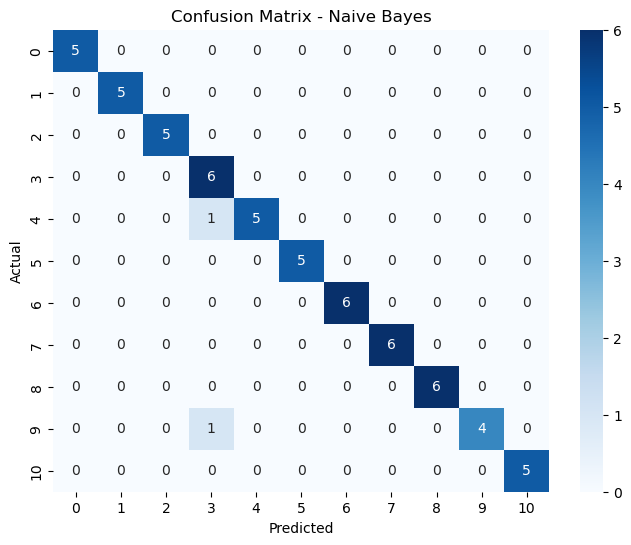

Naive Bayes AUC-ROC Score: 0.9791


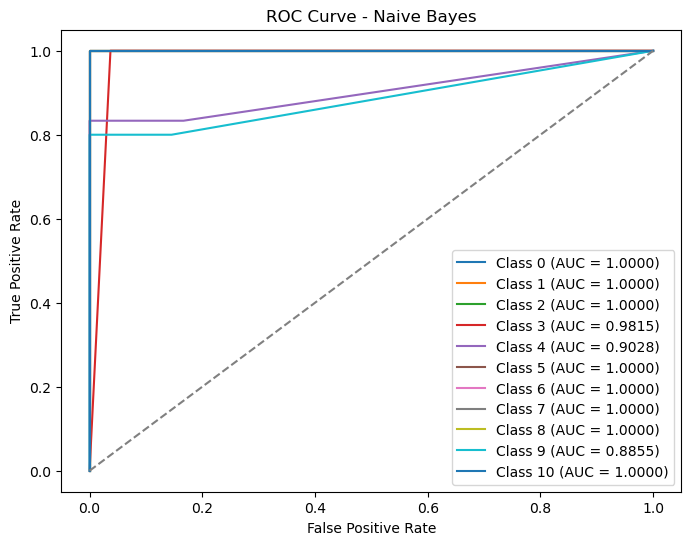

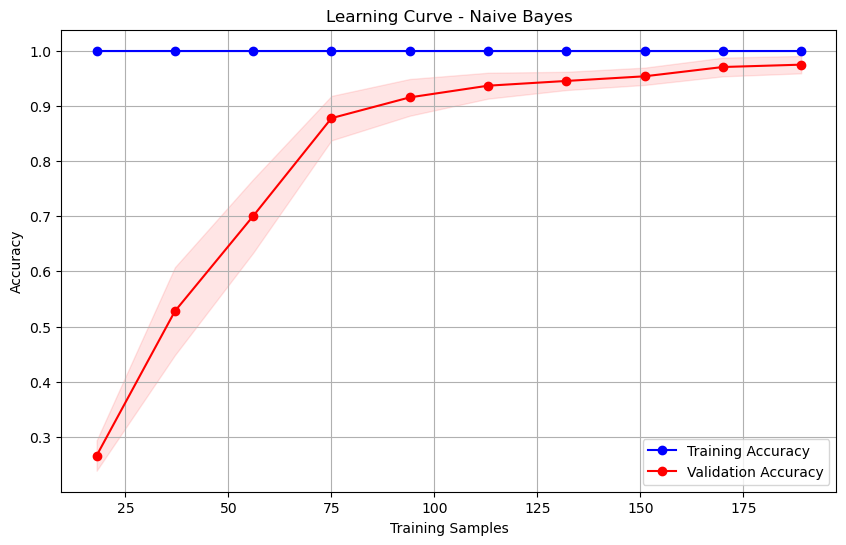

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = r"C:\Users\natra\Downloads\bio dataset\data11tumors2.csv"
df = pd.read_csv(file_path)

# Extract features and labels
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Feature selection (Reducing to avoid overfitting)
k = 300  # Adjusted feature selection for Naive Bayes
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Normalization (Naive Bayes performs well with Min-Max Scaling)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_test_pred = nb.predict(X_test)
y_test_prob = nb.predict_proba(X_test)  # Probabilities for AUC-ROC

# Accuracy metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Naive Bayes Test Accuracy: {test_accuracy:.4f}")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# AUC-ROC Score
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

if y_test_bin.shape[1] == 1:  # Binary classification
    auc_score = roc_auc_score(y_test, y_test_prob[:, 1])
    fpr, tpr, _ = roc_curve(y_test, y_test_prob[:, 1])
else:  # Multi-class classification (average AUC)
    auc_score = roc_auc_score(y_test_bin, y_test_prob, average='macro', multi_class='ovr')

print(f"Naive Bayes AUC-ROC Score: {auc_score:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
if y_test_bin.shape[1] == 1:
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
else:
    for i in range(y_test_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc_score(y_test_bin[:, i], y_test_prob[:, i]):.4f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naive Bayes")
plt.legend()
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(nb, X_train, y_train, cv=5, scoring='accuracy',
                                                        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

plt.plot(train_sizes, test_mean, 'o-', color='red', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')

plt.xlabel('Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Naive Bayes')
plt.legend(loc='best')
plt.grid()
plt.show()


Gradient Boosting Train Accuracy: 1.0000
Gradient Boosting Test Accuracy: 0.9500
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         6
           4       1.00      0.83      0.91         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       0.83      1.00      0.91         5
          10       1.00      0.80      0.89         5

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.96      0.95      0.95        60



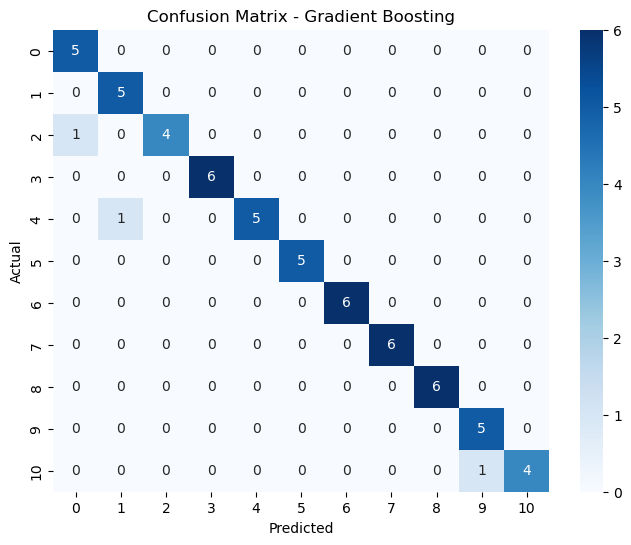

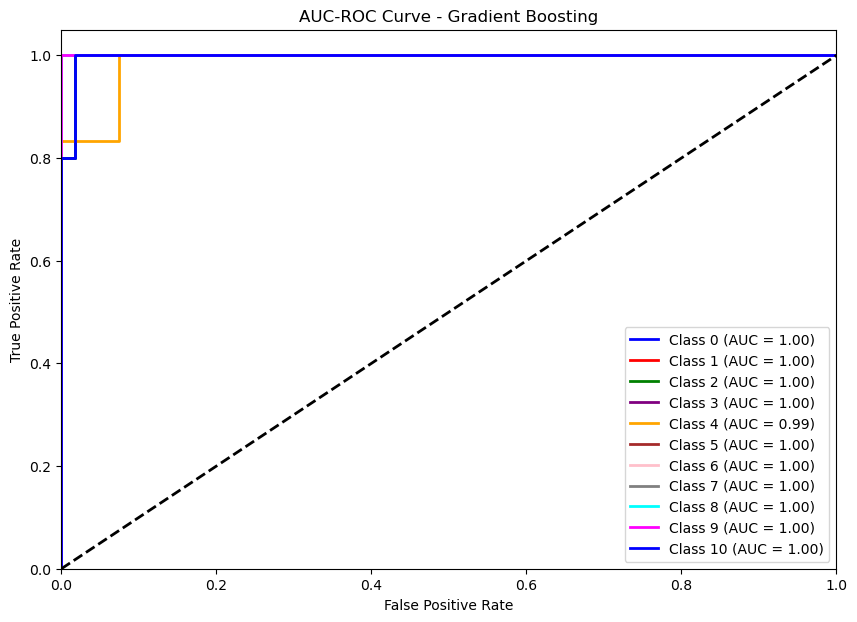

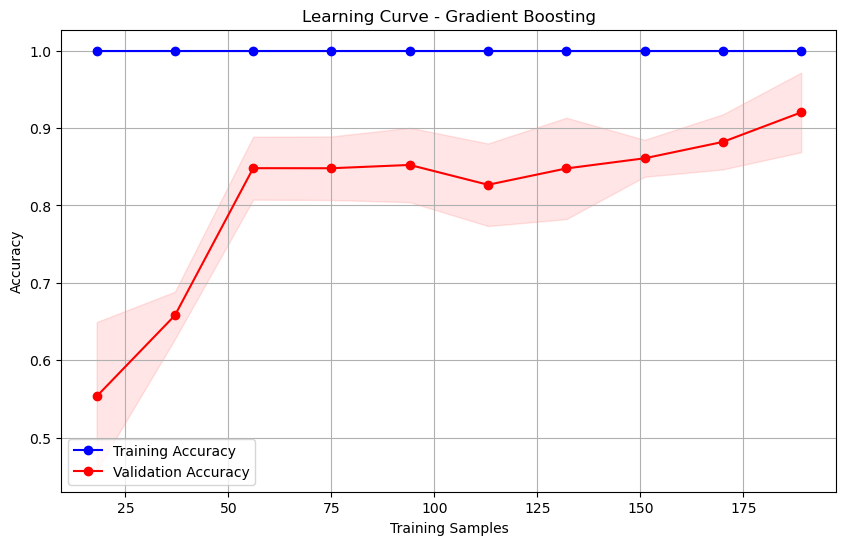

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import RobustScaler, label_binarize
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from itertools import cycle

# Load dataset
file_path = r"C:\Users\natra\Downloads\bio dataset\data11tumors2.csv"
df = pd.read_csv(file_path)

# Extract features and labels
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Feature selection (Reducing to avoid overfitting)
k = 500
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Standardization
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.2, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate the model
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Gradient Boosting Train Accuracy: {train_accuracy:.4f}")
print(f"Gradient Boosting Test Accuracy: {test_accuracy:.4f}")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

# AUC-ROC Curve
y_test_bin = label_binarize(y_test, classes=np.unique(y))  # Convert labels to binary format for multi-class
y_score = gb_model.predict_proba(X_test)  # Get probabilities

n_classes = y_test_bin.shape[1]
colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta'])

plt.figure(figsize=(10, 7))
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    gb_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

plt.plot(train_sizes, test_mean, 'o-', color='red', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')

plt.xlabel('Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Gradient Boosting')
plt.legend(loc='best')
plt.grid()
plt.show()


Logistic Regression Train Accuracy: 1.0000
Logistic Regression Test Accuracy: 0.9833
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      0.80      0.89         5
           3       0.86      1.00      0.92         6
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.99      0.98      0.98        60



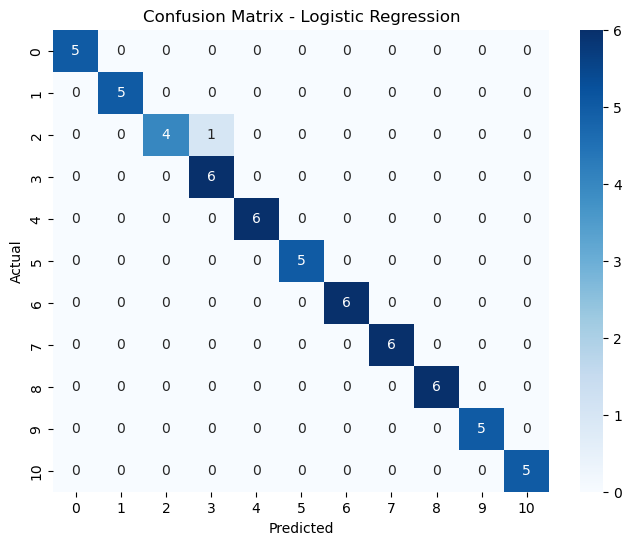

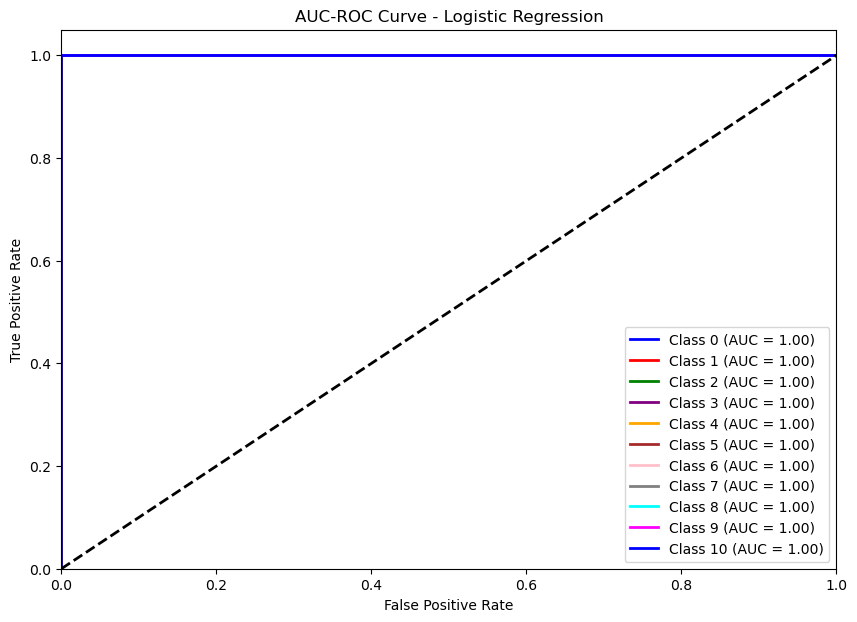

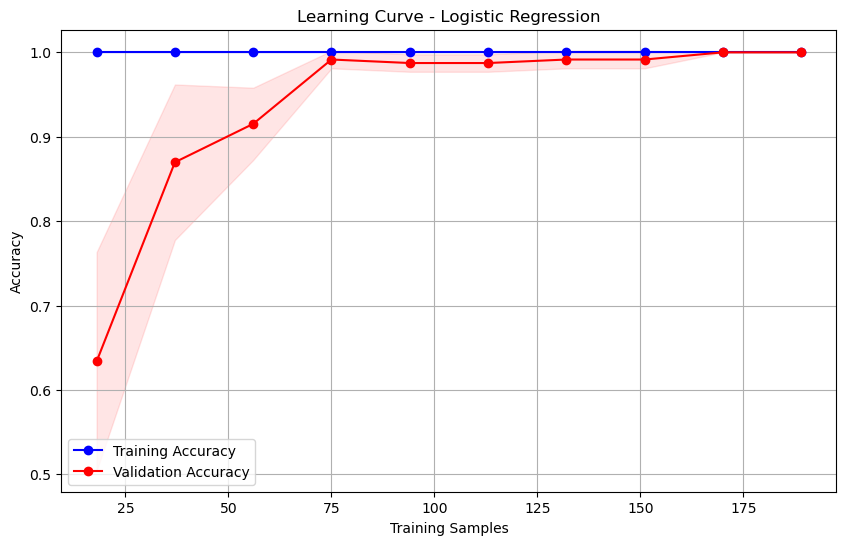

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from itertools import cycle

# Load dataset
file_path = r"C:\Users\natra\Downloads\bio dataset\data11tumors2.csv"
df = pd.read_csv(file_path)

# Extract features and labels
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Feature selection (Selecting top k features)
k = 500
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning for Logistic Regression
param_grid = {'C': [0.1, 1, 10, 100]}
log_reg = GridSearchCV(LogisticRegression(max_iter=500, random_state=42), param_grid, cv=5)
log_reg.fit(X_train, y_train)

# Evaluate the model
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Logistic Regression Train Accuracy: {train_accuracy:.4f}")
print(f"Logistic Regression Test Accuracy: {test_accuracy:.4f}")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# AUC-ROC Curve
y_test_bin = label_binarize(y_test, classes=np.unique(y))  # Convert labels to binary format for multi-class
y_score = log_reg.predict_proba(X_test)  # Get probability predictions

n_classes = y_test_bin.shape[1]
colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta'])

plt.figure(figsize=(10, 7))
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    log_reg.best_estimator_, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

plt.plot(train_sizes, test_mean, 'o-', color='red', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')

plt.xlabel('Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Logistic Regression')
plt.legend(loc='best')
plt.grid()
plt.show()


LDA Train Accuracy: 1.0000
LDA Test Accuracy: 0.9000
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       1.00      1.00      1.00         5
           2       0.67      0.40      0.50         5
           3       0.83      0.83      0.83         6
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      0.80      0.89         5
          10       0.83      1.00      0.91         5

    accuracy                           0.90        60
   macro avg       0.90      0.89      0.89        60
weighted avg       0.91      0.90      0.90        60



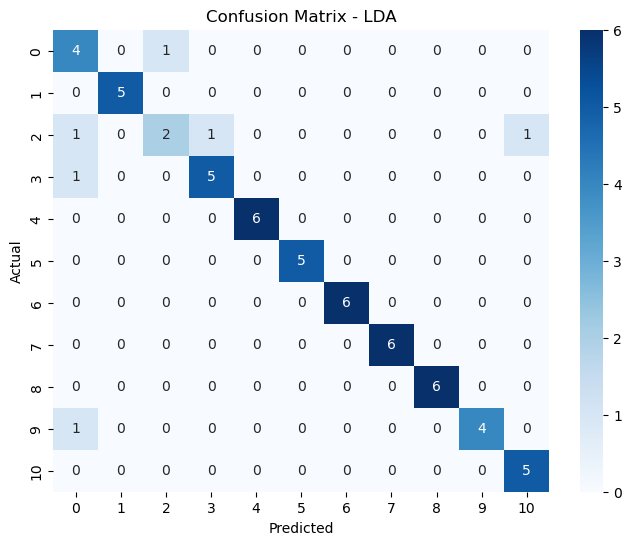

LDA AUC-ROC Score: 0.9496


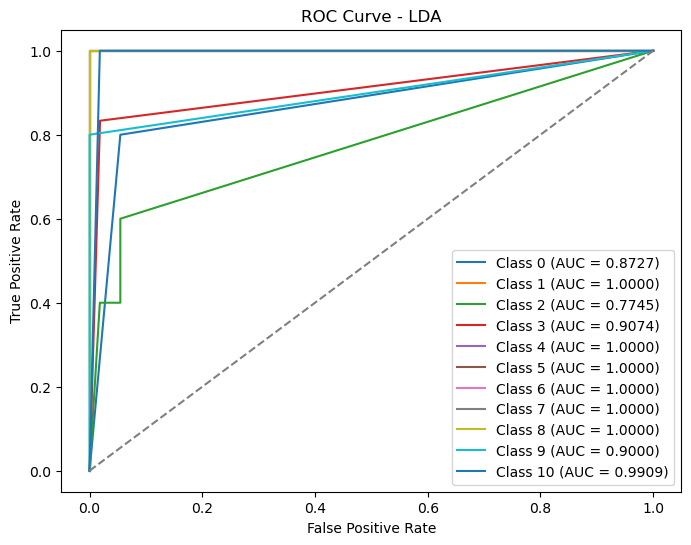

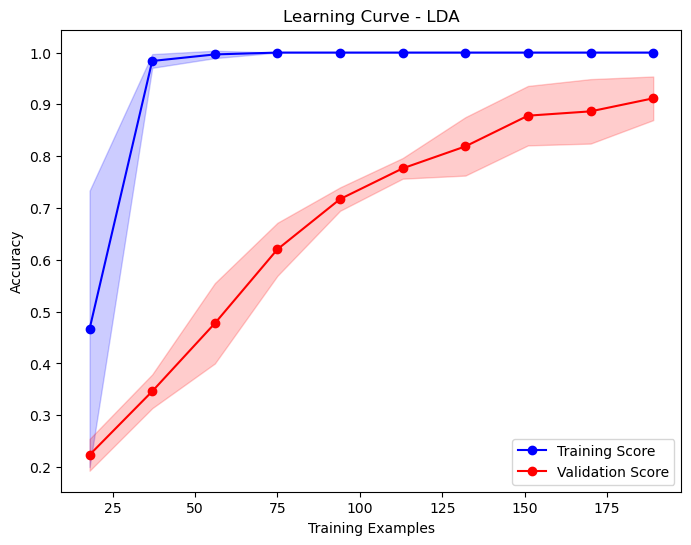

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = r"C:\Users\natra\Downloads\bio dataset\data11tumors2.csv"
df = pd.read_csv(file_path)

# Extract features and labels
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Evaluate the model
y_train_pred = lda.predict(X_train)
y_test_pred = lda.predict(X_test)
y_test_prob = lda.predict_proba(X_test)  # For AUC-ROC

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"LDA Train Accuracy: {train_accuracy:.4f}")
print(f"LDA Test Accuracy: {test_accuracy:.4f}")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LDA')
plt.show()

# AUC-ROC Curve
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

if y_test_bin.shape[1] == 1:  # Binary classification
    auc_score = roc_auc_score(y_test, y_test_prob[:, 1])
    fpr, tpr, _ = roc_curve(y_test, y_test_prob[:, 1])
else:  # Multi-class classification (average AUC)
    auc_score = roc_auc_score(y_test_bin, y_test_prob, average='macro', multi_class='ovr')

print(f"LDA AUC-ROC Score: {auc_score:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
if y_test_bin.shape[1] == 1:
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
else:
    for i in range(y_test_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc_score(y_test_bin[:, i], y_test_prob[:, i]):.4f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LDA")
plt.legend()
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(lda, X_train, y_train, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and std deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="red", label="Validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="red")

plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve - LDA")
plt.legend()
plt.show()


Random Forest Train Accuracy: 1.0000
Random Forest Test Accuracy: 0.9667
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      1.00      1.00         5
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         6
           4       0.86      1.00      0.92         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      0.80      0.89         5
          10       1.00      1.00      1.00         5

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



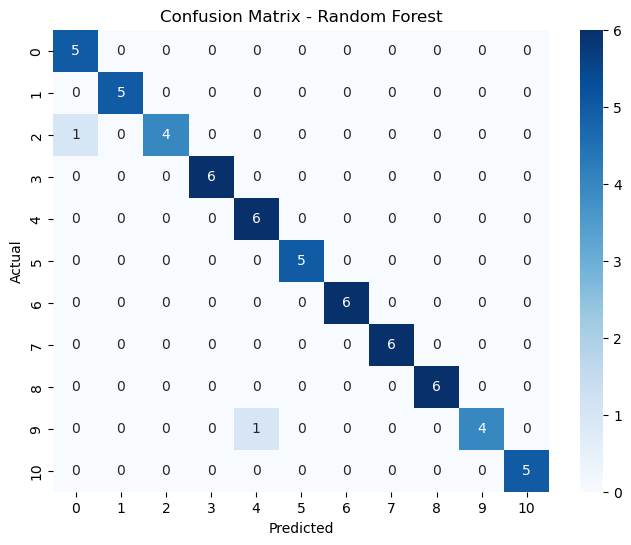

Random Forest AUC-ROC Score: 0.9983


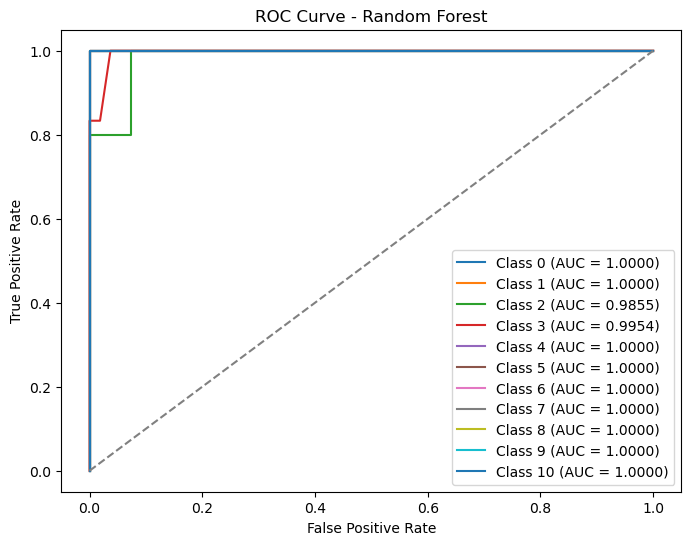

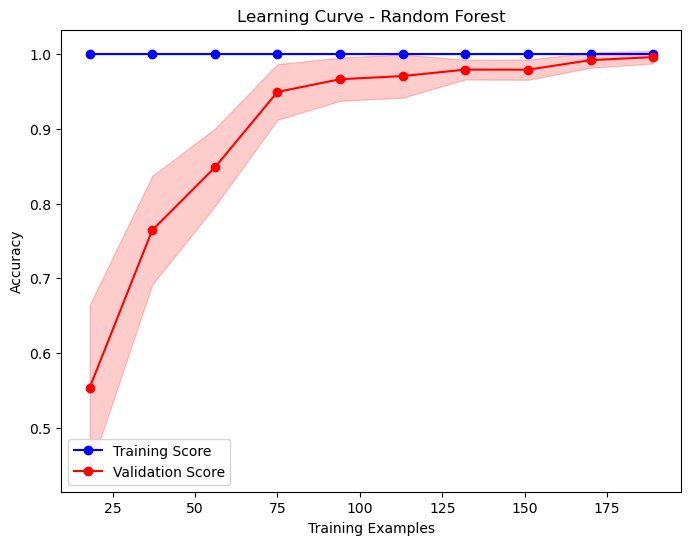

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = r"C:\Users\natra\Downloads\bio dataset\data11tumors2.csv"
df = pd.read_csv(file_path)

# Extract features and labels
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Feature Selection (Select top 500 features)
k = 500  
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
y_test_prob = rf_model.predict_proba(X_test)  # For AUC-ROC

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Random Forest Train Accuracy: {train_accuracy:.4f}")
print(f"Random Forest Test Accuracy: {test_accuracy:.4f}")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# AUC-ROC Curve
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

if y_test_bin.shape[1] == 1:  # Binary classification
    auc_score = roc_auc_score(y_test, y_test_prob[:, 1])
    fpr, tpr, _ = roc_curve(y_test, y_test_prob[:, 1])
else:  # Multi-class classification (average AUC)
    auc_score = roc_auc_score(y_test_bin, y_test_prob, average='macro', multi_class='ovr')

print(f"Random Forest AUC-ROC Score: {auc_score:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
if y_test_bin.shape[1] == 1:
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
else:
    for i in range(y_test_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc_score(y_test_bin[:, i], y_test_prob[:, i]):.4f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and std deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="red", label="Validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="red")

plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Random Forest")
plt.legend()
plt.show()


SVM Train Accuracy: 1.0000
SVM Test Accuracy: 0.9833
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00         5
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.99      0.98      0.98        60



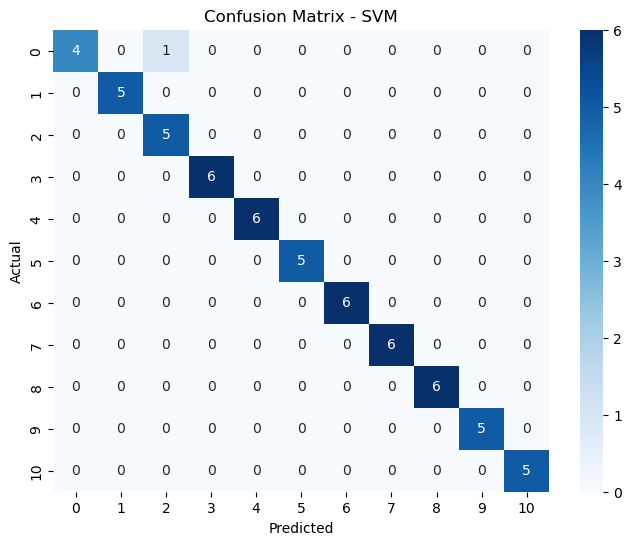

SVM AUC-ROC Score: 0.9993


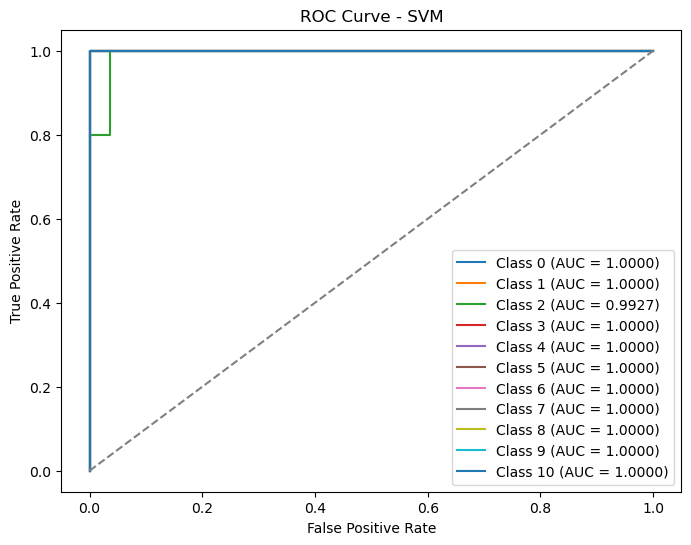

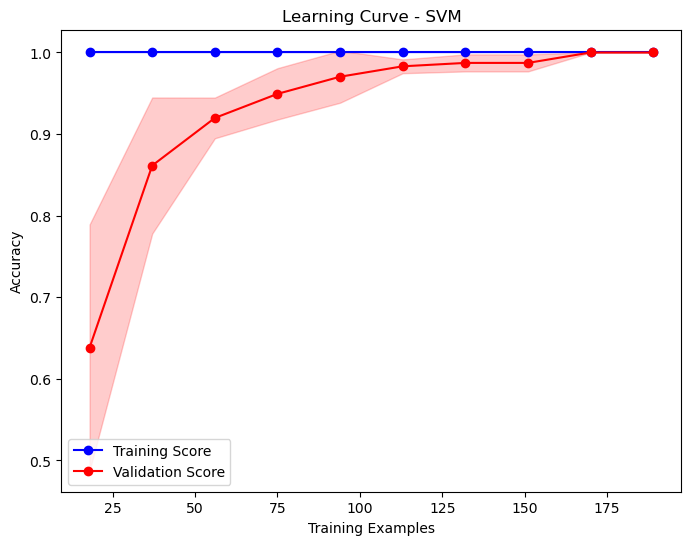

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = r"C:\Users\natra\Downloads\bio dataset\data11tumors2.csv"
df = pd.read_csv(file_path)

# Extract features and labels
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Feature selection (Reducing to avoid overfitting)
k = 300  # Select top 300 features
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Standardization (Best for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM model with RBF Kernel and tuned hyperparameters
svm_model = SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the model
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)
y_test_prob = svm_model.predict_proba(X_test)  # Needed for AUC-ROC

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"SVM Train Accuracy: {train_accuracy:.4f}")
print(f"SVM Test Accuracy: {test_accuracy:.4f}")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

# AUC-ROC Curve
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

if y_test_bin.shape[1] == 1:  # Binary classification
    auc_score = roc_auc_score(y_test, y_test_prob[:, 1])
    fpr, tpr, _ = roc_curve(y_test, y_test_prob[:, 1])
else:  # Multi-class classification (average AUC)
    auc_score = roc_auc_score(y_test_bin, y_test_prob, average='macro', multi_class='ovr')

print(f"SVM AUC-ROC Score: {auc_score:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
if y_test_bin.shape[1] == 1:
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
else:
    for i in range(y_test_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc_score(y_test_bin[:, i], y_test_prob[:, i]):.4f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(svm_model, X_train, y_train, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and std deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="red", label="Validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="red")

plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve - SVM")
plt.legend()
plt.show()


KNN Train Accuracy: 0.9831
KNN Test Accuracy: 0.9500
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      0.83      0.91         6
           4       0.75      1.00      0.86         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         6
           8       0.86      1.00      0.92         6
           9       1.00      0.60      0.75         5
          10       1.00      1.00      1.00         5

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.96      0.95      0.95        60



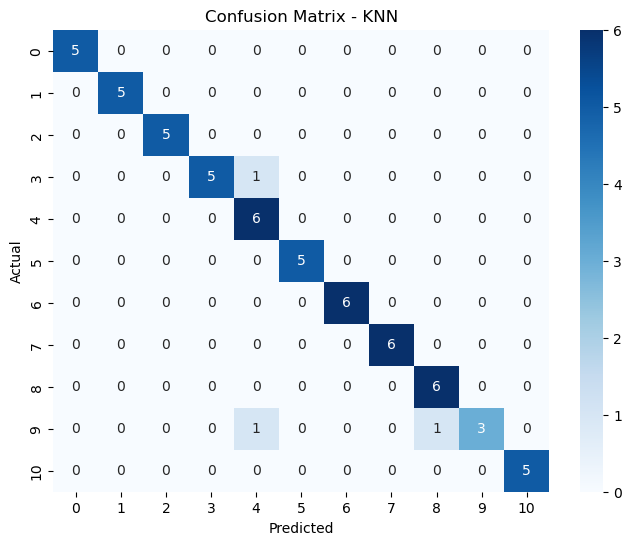

KNN AUC-ROC Score: 0.9893


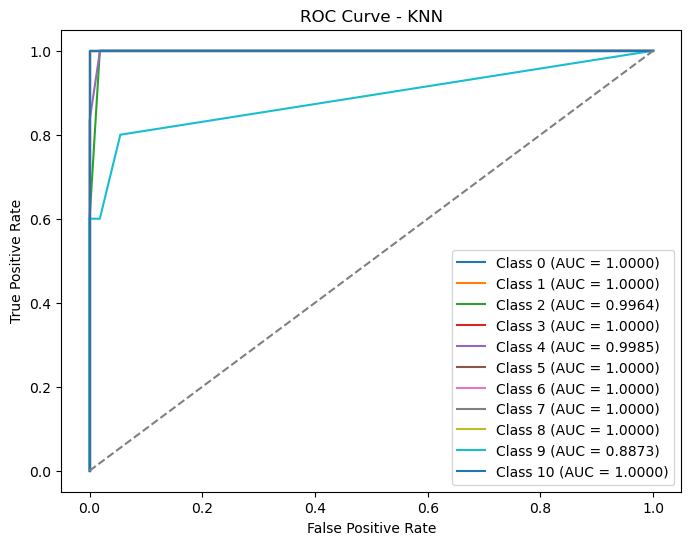

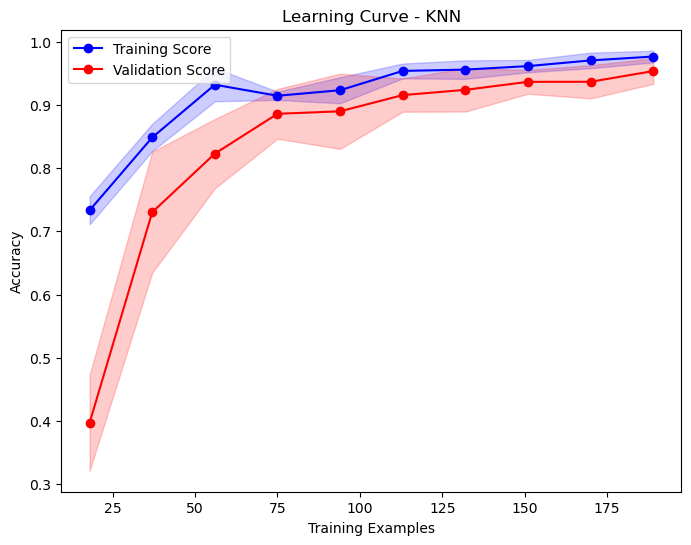

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = r"C:\Users\natra\Downloads\bio dataset\data11tumors2.csv"
df = pd.read_csv(file_path)

# Extract features and labels
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Feature Selection (Select top 400 features for KNN)
k = 400  
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Min-Max Scaling (KNN requires normalized data)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN model (Choosing k=5 as a balanced choice)
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_model.fit(X_train, y_train)

# Evaluate the model
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
y_test_prob = knn_model.predict_proba(X_test)  # Needed for AUC-ROC

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"KNN Train Accuracy: {train_accuracy:.4f}")
print(f"KNN Test Accuracy: {test_accuracy:.4f}")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

# AUC-ROC Curve
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

if y_test_bin.shape[1] == 1:  # Binary classification
    auc_score = roc_auc_score(y_test, y_test_prob[:, 1])
    fpr, tpr, _ = roc_curve(y_test, y_test_prob[:, 1])
else:  # Multi-class classification (average AUC)
    auc_score = roc_auc_score(y_test_bin, y_test_prob, average='macro', multi_class='ovr')

print(f"KNN AUC-ROC Score: {auc_score:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
if y_test_bin.shape[1] == 1:
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
else:
    for i in range(y_test_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc_score(y_test_bin[:, i], y_test_prob[:, i]):.4f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend()
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(knn_model, X_train, y_train, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and std deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="red", label="Validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="red")

plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve - KNN")
plt.legend()
plt.show()


MLP Train Accuracy: 1.0000
MLP Test Accuracy: 0.9167
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00         5
           2       0.67      0.80      0.73         5
           3       0.75      1.00      0.86         6
           4       0.83      0.83      0.83         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      0.60      0.75         5
          10       1.00      1.00      1.00         5

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60



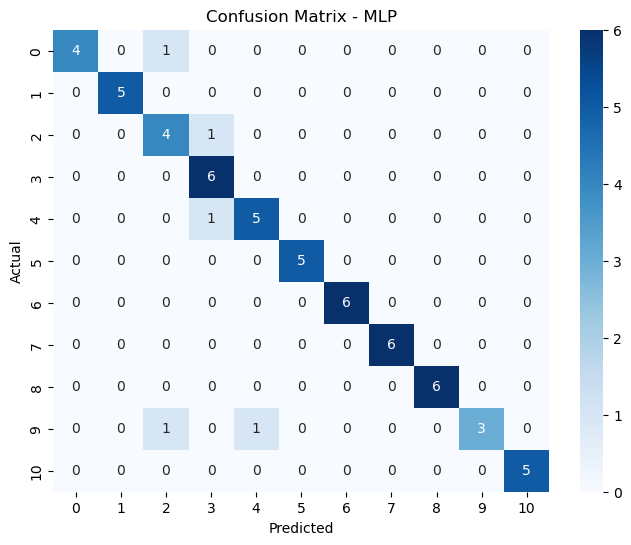

MLP AUC-ROC Score: 0.9985


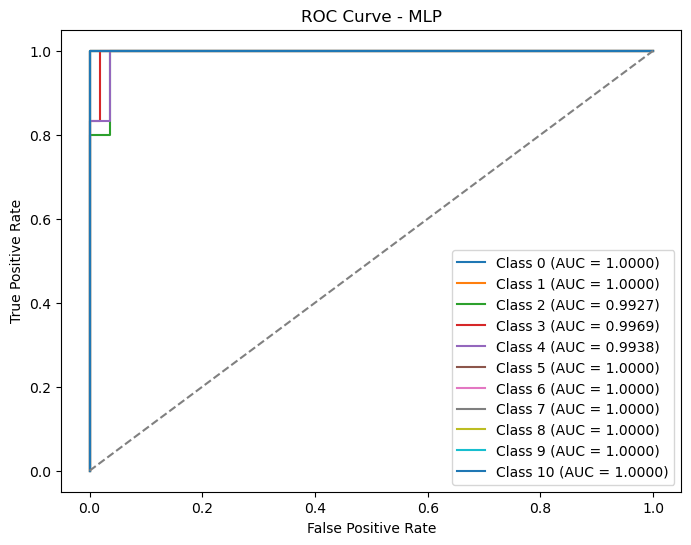

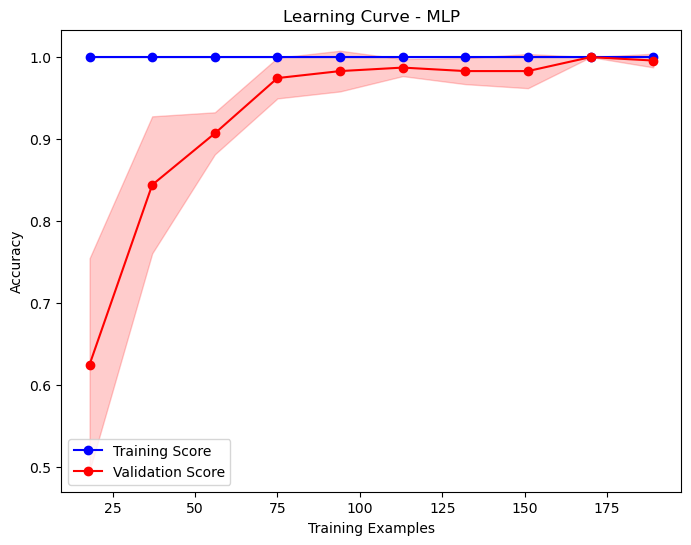

NameError: name 'model_mlp' is not defined

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = r"C:\Users\natra\Downloads\bio dataset\data11tumors2.csv"
df = pd.read_csv(file_path)

# Extract features and labels
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Feature Selection (MLP benefits from fewer features for faster training)
k = 300  
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Standardization (MLP requires standardized data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Evaluate the model
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)
y_test_prob = mlp.predict_proba(X_test)  # Needed for AUC-ROC

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"MLP Train Accuracy: {train_accuracy:.4f}")
print(f"MLP Test Accuracy: {test_accuracy:.4f}")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MLP')
plt.show()

# AUC-ROC Curve
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

if y_test_bin.shape[1] == 1:  # Binary classification
    auc_score = roc_auc_score(y_test, y_test_prob[:, 1])
    fpr, tpr, _ = roc_curve(y_test, y_test_prob[:, 1])
else:  # Multi-class classification (average AUC)
    auc_score = roc_auc_score(y_test_bin, y_test_prob, average='macro', multi_class='ovr')

print(f"MLP AUC-ROC Score: {auc_score:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
if y_test_bin.shape[1] == 1:
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
else:
    for i in range(y_test_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc_score(y_test_bin[:, i], y_test_prob[:, i]):.4f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - MLP")
plt.legend()
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(mlp, X_train, y_train, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and std deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="red", label="Validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="red")

plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve - MLP")
plt.legend()
plt.show()
mlp_loss = model_mlp.loss_curve_  # Training loss per epoch


combining code

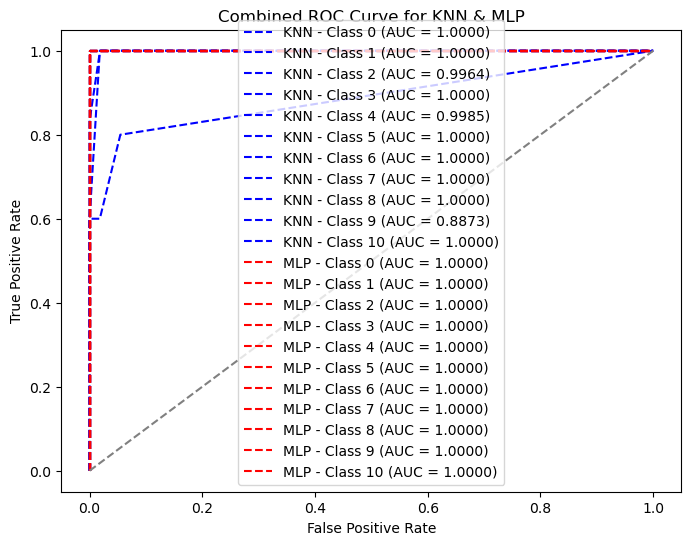

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = r"C:\Users\natra\Downloads\bio dataset\data11tumors2.csv"
df = pd.read_csv(file_path)

# Extract features and labels
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Feature Selection (Top 400 for KNN, Top 300 for MLP)
selector = SelectKBest(score_func=f_classif, k=400)
X_selected = selector.fit_transform(X, y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Standard Scaling for MLP
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

# Min-Max Scaling for KNN
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_minmax, y_train)

# Train MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train_standard, y_train)

# Get predicted probabilities for AUC-ROC
y_test_prob_knn = knn.predict_proba(X_test_minmax)
y_test_prob_mlp = mlp.predict_proba(X_test_standard)

# Label binarization for multiclass AUC
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Compute AUC-ROC
plt.figure(figsize=(8, 6))

models = {"KNN": y_test_prob_knn, "MLP": y_test_prob_mlp}
colors = {"KNN": "blue", "MLP": "red"}

for model_name, y_prob in models.items():
    if y_test_bin.shape[1] == 1:  # Binary classification
        auc_score = roc_auc_score(y_test, y_prob[:, 1])
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.4f})", color=colors[model_name])
    else:  # Multi-class classification
        auc_score = roc_auc_score(y_test_bin, y_prob, average="macro", multi_class="ovr")
        for i in range(y_test_bin.shape[1]):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
            plt.plot(fpr, tpr, label=f"{model_name} - Class {i} (AUC = {roc_auc_score(y_test_bin[:, i], y_prob[:, i]):.4f})", linestyle="--", color=colors[model_name])

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Combined ROC Curve for KNN & MLP")
plt.legend()
plt.show()


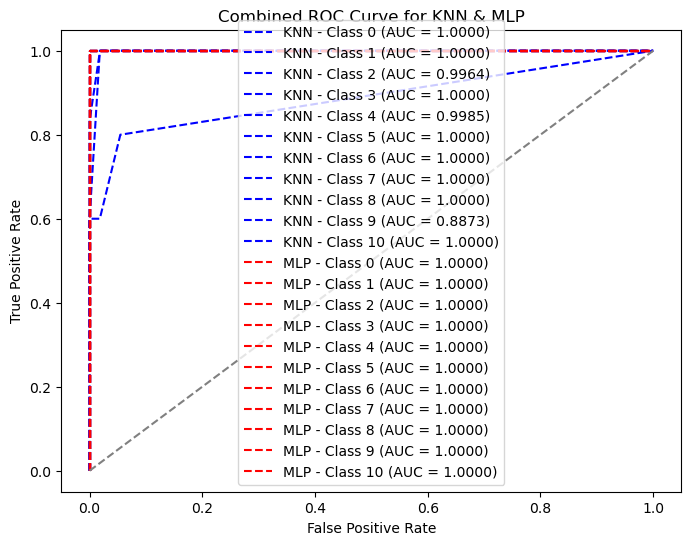

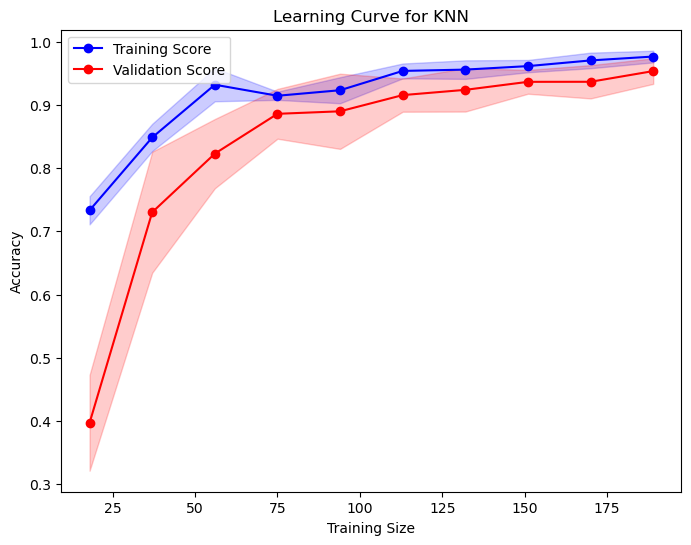

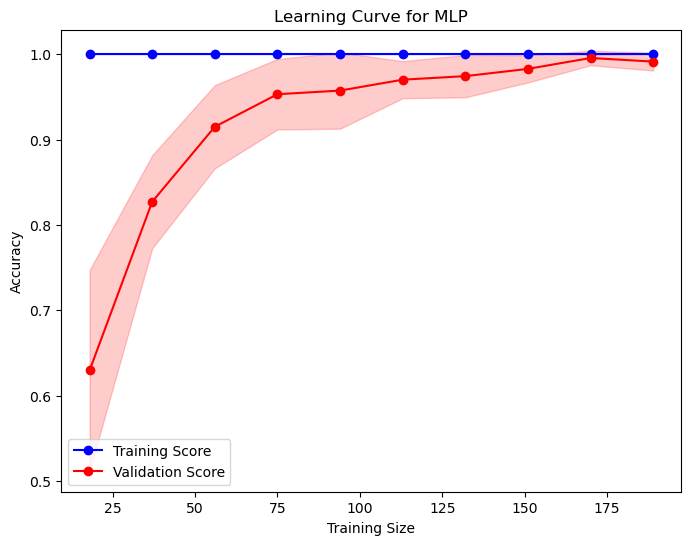

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = r"C:\Users\natra\Downloads\bio dataset\data11tumors2.csv"
df = pd.read_csv(file_path)

# Extract features and labels
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Feature Selection (Top 400 for KNN, Top 300 for MLP)
selector = SelectKBest(score_func=f_classif, k=400)
X_selected = selector.fit_transform(X, y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Standard Scaling for MLP
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

# Min-Max Scaling for KNN
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_minmax, y_train)

# Train MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train_standard, y_train)

# Get predicted probabilities for AUC-ROC
y_test_prob_knn = knn.predict_proba(X_test_minmax)
y_test_prob_mlp = mlp.predict_proba(X_test_standard)

# Label binarization for multiclass AUC
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Compute AUC-ROC
plt.figure(figsize=(8, 6))
models = {"KNN": y_test_prob_knn, "MLP": y_test_prob_mlp}
colors = {"KNN": "blue", "MLP": "red"}

for model_name, y_prob in models.items():
    if y_test_bin.shape[1] == 1:  # Binary classification
        auc_score = roc_auc_score(y_test, y_prob[:, 1])
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.4f})", color=colors[model_name])
    else:  # Multi-class classification
        auc_score = roc_auc_score(y_test_bin, y_prob, average="macro", multi_class="ovr")
        for i in range(y_test_bin.shape[1]):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
            plt.plot(fpr, tpr, label=f"{model_name} - Class {i} (AUC = {roc_auc_score(y_test_bin[:, i], y_prob[:, i]):.4f})", linestyle="--", color=colors[model_name])

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Combined ROC Curve for KNN & MLP")
plt.legend()
plt.show()

# Function to plot learning curves
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
    plt.plot(train_sizes, test_mean, 'o-', color='red', label='Validation Score')
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='red')
    
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot learning curves
plot_learning_curve(knn, X_train_minmax, y_train, 'Learning Curve for KNN')
plot_learning_curve(mlp, X_train_standard, y_train, 'Learning Curve for MLP')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load dataset
file_path = r"C:\Users\natra\Downloads\bio dataset\data11tumors2.csv"
df = pd.read_csv(file_path)

# Extract features and labels
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Standardization for models that require scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500),
    "LDA": LinearDiscriminantAnalysis(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, max_depth=5),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel='rbf', C=10, gamma='scale'),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=15)
}

plt.figure(figsize=(10, 7))

# Generate learning curves for all models
for name, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train_scaled, y_train, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, test_mean, label=name)

plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.title("Learning Curves of Different Models")
plt.legend()
plt.show()


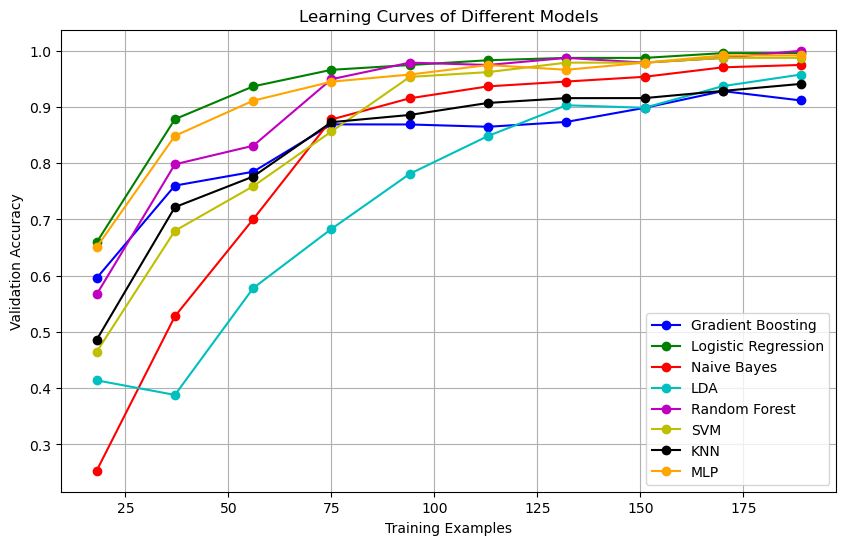

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Define models
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)
}

plt.figure(figsize=(10, 6))
colors = ["b", "g", "r", "c", "m", "y", "k", "orange"]  # Unique colors for each model

# Generate learning curves for all models
for (name, model), color in zip(models.items(), colors):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    
    plt.plot(train_sizes, test_mean, marker='o', color=color, label=name)

plt.xlabel("Training Examples")
plt.ylabel("Validation Accuracy")
plt.title("Learning Curves of Different Models")
plt.legend()
plt.grid()
plt.show()


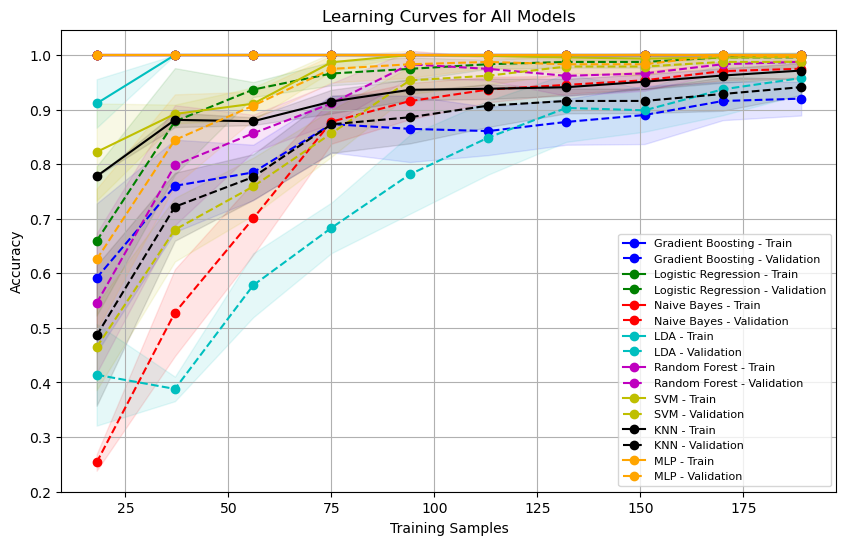

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# List of models with their names
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5, metric='euclidean'),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
}

# Training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

plt.figure(figsize=(10, 6))

# Colors for different models
colors = ["b", "g", "r", "c", "m", "y", "k", "orange"]

for (name, model), color in zip(models.items(), colors):
    # Compute learning curve
    train_sizes_abs, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, train_sizes=train_sizes, scoring="accuracy"
    )

    # Mean and standard deviation
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curves
    plt.plot(train_sizes_abs, train_mean, 'o-', color=color, label=f"{name} - Train")
    plt.plot(train_sizes_abs, test_mean, 'o--', color=color, label=f"{name} - Validation")

    # Fill region for standard deviation
    plt.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.1, color=color)
    plt.fill_between(train_sizes_abs, test_mean - test_std, test_mean + test_std, alpha=0.1, color=color)

plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.title("Learning Curves for All Models")
plt.legend(loc="best", fontsize=8)
plt.grid()
plt.show()
